In [1]:
from dataclasses import dataclass
from observer import CalibratedObserver, TrackedObject, CalibratedCaptureConfiguration
import dma.MechaCombat as mc
QuantumSystem = mc.QuantumSystem
qs = QuantumSystem

In [2]:
class ObjectAction:
    def __init__(self, cap, target, result=None):
        self.cap = cap
        self.target = target
        self.targetDistance = app.cm.cc.rsc.distanceBetweenObjects(self.cap, self.target)
        self.targetRange = "short" if targetDistance < 155 else "medium" if targetDistance < 610 else "long"
        self.rangeModifier = 0 if "short" else 2 if "medium" else 4

        self.objMovement = app.cm.cc.rsc.trackedObjectLastDistance(cap)
        self.aMM = -1 if objMovement is None or objMovement < 10 else 1
        self.targetMovement = app.cm.cc.rsc.trackedObjectLastDistance(target)
        self.tMM = -1 if targetMovement is None or targetMovement < 10 else 1
        self.targetNumber = int(cap.Skill) + aMM + tMM + 0 + rangeModifier
        self.result = result

In [3]:
@dataclass
class HarmonyObject:
    objectType: str
    objectSubType: str
    objectKwargs: dict

    objectFactories = {"Mech": mc.MechFactories, "Structure": mc.StructureFactories}
    
    def __post_init__(self):
        super().__post_init__()
        try:
            factory = self.objectFactories[self.objectType][self.objectSubType]
        except KeyError as ke:
            raise Exception(f"Unrecognized object type and subtype - {objectType}-{objectSubType}")
        factory(self.oid, **objectKwargs)

In [4]:
class HarmonyMachine(CalibratedObserver):
    def reset(self):
        super().reset()
        mc.GameState.reset()
        self.GameState = mc.GameState

Starting Cycle     0 -- CapMac -- passive idle


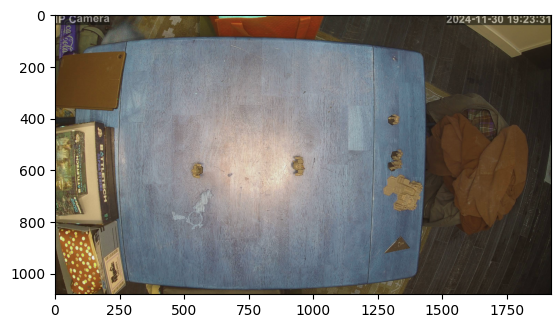

In [5]:
if __name__ == "__main__":
    from matplotlib import pyplot as plt
    cc = CalibratedCaptureConfiguration()
    hm = HarmonyMachine(cc)
    hm.cycle()
    plt.imshow(cc.cameras['0'].mostRecentFrame)